In [1]:
###########################################################################
# Note book for Experiments conducted in week 2.
# The experiments were
# 1) Plotting distribution of order statistics when sampled from a Uniform.
# 2) Plotting distribution of order statistics when sampled from a Gausian.
###########################################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

samples = np.random.uniform(0,1,(1000,100))
print (samples.shape)

(1000, 100)


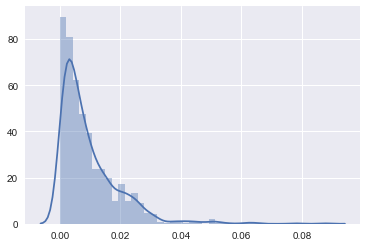

In [2]:
###############Seeing curves at different percentiles###############
sorted_samples = np.sort(samples, axis = 1)
z_1 = sorted_samples[:,0]
sns.set(color_codes=True)
sns.distplot(z_1);

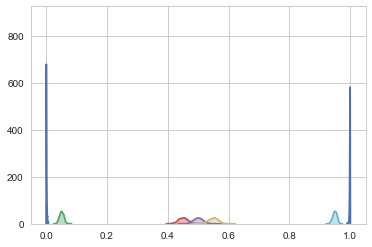

In [5]:
# Emperical correspondence of i and n(sample size)

n = 1000
samples = np.random.uniform(0,1,(1000,n))
sorted_samples = np.sort(samples, axis = 1)
z_1 = sorted_samples[:,0]
z_50 = sorted_samples[:,50]
z_450 = sorted_samples[:,450]
z_500 = sorted_samples[:,500]
z_550 = sorted_samples[:,550]
z_950 = sorted_samples[:,950]
z_1000 = sorted_samples[:,999]
sns.set(color_codes=True)
sns.set_style("whitegrid")

sns.distplot(z_1)
sns.distplot(z_50)
sns.distplot(z_450)
sns.distplot(z_500)
sns.distplot(z_550)
sns.distplot(z_950)
sns.distplot(z_1000)

# observation - we see that the distribution of the order statistics is a beta; the first percentile
# is more concetrated to lower values with almost 95 % of the values lying in a very low range.
# It is evident that the samples in the 50th percentile vary a lot, with a spread of 0.4 to 0.5.
# This is an indecation that the bounds at the end of a uniform CDF are tighter at the smallest and largest
# order statistics and looser at the middle order statistics.

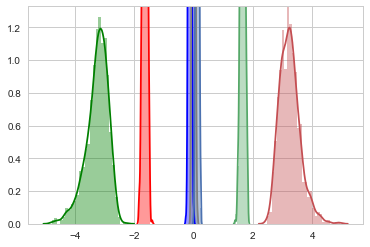

In [6]:
# Here we will samples from a gausian and plot the percentiles
# Gausian is 0 mean and unit variance

samples = np.random.normal(0,1,(1000,n))
n = 1000
sorted_samples = np.sort(samples, axis = 1)
z_1 = sorted_samples[:,0]
z_50 = sorted_samples[:,50]
z_450 = sorted_samples[:,450]
z_500 = sorted_samples[:,500]
z_550 = sorted_samples[:,550]
z_950 = sorted_samples[:,950]
z_1000 = sorted_samples[:,999]

sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.distplot(z_1, color = "green")
sns.distplot(z_50, color = "red")
sns.distplot(z_450, color = "blue")
sns.distplot(z_500, color = "gray")
sns.distplot(z_550)
sns.distplot(z_950)
sns.distplot(z_1000)

# observation - in case of a gausian, we see that the distribution of the order statistics is again a beta.
# However the tightness follows a different pattern here. The middle most order statistics are tight at the
# middle order statistics and looser at the smallest and largest order statistics.

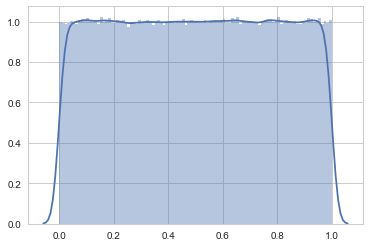

In [7]:
# Proving that the Random Experiment of mapping samples from a gausian through
# its cumulative results in a uniform distribution.

from scipy.stats import norm
normal_dist = np.random.normal(0,5, 1000000)
normal_samples = norm.cdf(normal_dist, loc = 0, scale = 5)
sns.distplot(normal_samples, bins = 100)

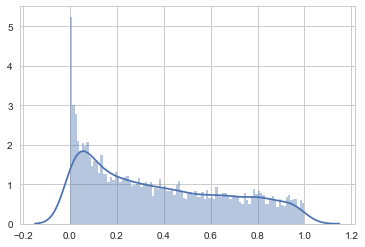

In [39]:
# An attempt to Empirically prove the same for a double peaked Gausian. 

normal_dist_1 = np.random.normal(0,5, 10000)
normal_cdf_1 = norm.cdf(normal_dist, loc = 0, scale = 5)

normal_dist_2 = np.random.normal(5,5, 10000)
normal_cdf_2 = norm.cdf(normal_dist, loc = 5, scale = 5)

total_cdf = np.concatenate((normal_cdf_1, normal_cdf_2))
sample_idx = np.random.randint(0, 20000, size=10000)
cdf_samples = total_cdf[sample_idx]
sns.distplot(cdf_samples, bins=100)
